# Best Directors to work with

## 

In [172]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)
%matplotlib inline
conn = sqlite3.connect('data/im.db')
cur = conn.cursor()


In [19]:
pd.read_sql("""
SELECT * 
  FROM movie_ratings
  where averagerating >= 8 AND numvotes >= 5000
""", conn)







,movie_id,averagerating,numvotes
0,tt1663202,8.0,621193
1,tt8108198,8.5,43409
2,tt1201607,8.1,691835
3,tt1255953,8.3,124156
4,tt1649431,8.2,5707
...,...,...,...
207,tt1424432,8.6,55318
208,tt1821700,8.1,28950
209,tt4154756,8.5,670926
210,tt3569782,8.3,8484


In [18]:
pd.read_sql("""
SELECT movie_id , primary_title , original_title , genres
    FROM movie_basics
""", conn)

,movie_id,primary_title,original_title,genres
0,tt0063540,Sunghursh,Sunghursh,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,"Comedy,Drama,Fantasy"
...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,Comedy
146142,tt9916730,6 Gunn,6 Gunn,None


In [220]:
top_20_movies_made_directors = """
SELECT person_id , primary_name as Director , COUNT(directors.movie_id) as "Movies Made"  
    FROM persons
    JOIN directors 
      USING (person_id)
    JOIN movie_basics
      USING (movie_id)
    GROUP BY person_id
    ORDER BY "Movies Made" DESC
    
;
"""
pd.read_sql(top_20_movies_made_directors, conn).head(20)

,person_id,Director,Movies Made
0,nm6935209,Tony Newton,238
1,nm2563700,Jason Impey,190
2,nm1546474,Shane Ryan,185
3,nm3877467,Ruben Rodriguez,180
4,nm3848412,Sam Mason-Bell,144
5,nm6078996,Martin Sonntag,135
6,nm4341114,Dustin Ferguson,121
7,nm4921301,Gav Chuckie Steel,119
8,nm3079464,Corey Norman,114
9,nm4542885,Evan Marlowe,101


In [227]:
avg_rating = """
SELECT person_id , primary_name as Director , COUNT(DISTINCT directors.movie_id) as "MoviesMade",  sum(movie_ratings.averagerating) / COUNT(movie_ratings.averagerating) as "Average Rating"
, movie_ratings.numvotes as numvotes
    FROM persons
    JOIN directors 
      USING (person_id)
    JOIN movie_basics
      USING (movie_id)
    JOIN movie_ratings
      USING (movie_id)
    GROUP BY person_id 
    HAVING "Movies Made" >= 5 AND "Average Rating" >= 7.5 AND numvotes >= 80000
    ORDER BY "Average Rating" DESC
    
;
"""
pd.read_sql(avg_rating, conn)

,person_id,Director,MoviesMade,Average Rating,numvotes
0,nm0000233,Quentin Tarantino,4,8.700000,1211405
1,nm2130108,Bob Persichetti,1,8.500000,210869
2,nm0745247,Rodney Rothman,1,8.500000,210869
3,nm0634240,Christopher Nolan,4,8.437500,1299334
4,nm2937122,Adrian Molina,1,8.400000,277194
5,nm0881279,Lee Unkrich,2,8.350000,682218
6,nm0751648,Joe Russo,4,8.246667,666252
7,nm0751577,Anthony Russo,4,8.246667,666252
8,nm0215455,Ronnie Del Carmen,1,8.200000,536181
9,nm1167933,Damián Szifron,1,8.100000,151123


In [222]:
Director = """
SELECT directors.person_id , persons.primary_name as Director,  movie_basics.primary_title ,  movie_ratings.averagerating 
FROM principals 
JOIN persons
      USING (person_id)
JOIN movie_basics
      USING (movie_id)
JOIN directors 
      USING (person_id)
      JOIN movie_ratings
      USING (movie_id)
WHERE person_id = 'nm0751648' 
GROUP BY movie_basics.primary_title
ORDER BY movie_ratings.averagerating DESC
"""
pd.read_sql(Director, conn)


,person_id,Director,primary_title,averagerating
0,nm0751648,Joe Russo,Avengers: Endgame,8.8
1,nm0751648,Joe Russo,Avengers: Infinity War,8.5
2,nm0751648,Joe Russo,Captain America: The Winter Soldier,7.8
3,nm0751648,Joe Russo,Captain America: Civil War,7.8


In [184]:
null_check = pd.read_sql(avg_rating,conn)
null_check.isna().sum()

person_id         0
Director          0
Movies Made       0
Average Rating    0
numvotes          0
dtype: int64

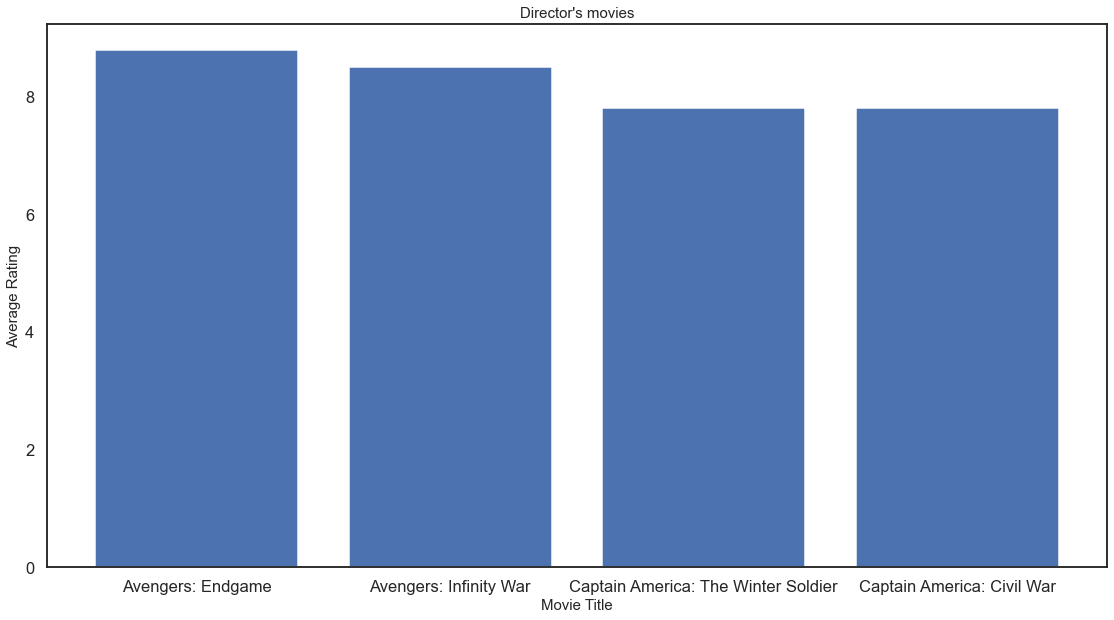

In [219]:
specific_director=pd.read_sql(Director, conn)
plt.figure(figsize=(19,10))
plt.bar('primary_title', 'averagerating',data=specific_director)
plt.xlabel("Movie Title", size=15)
plt.ylabel('Average Rating', size=15)
plt.title("Director's movies", size=15)
plt.show()